12699


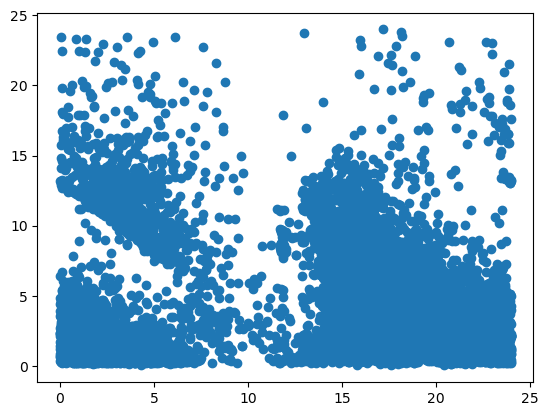

In [1]:
from datetime import datetime
import json
from math import sqrt
import numpy as np
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import random

def rgb_to_hex(rgb):
    # Convert the RGB values to hexadecimal strings
    r, g, b = rgb
    r_hex = hex(r)[2:].zfill(2)
    g_hex = hex(g)[2:].zfill(2)
    b_hex = hex(b)[2:].zfill(2)

    # Concatenate the hexadecimal strings
    hex_code = "#" + r_hex + g_hex + b_hex

    return hex_code


def convert_time_format(time_str):
    time_str = time_str[-12:-4]
    time_obj = datetime.strptime(time_str, '%H:%M:%S')
    hour_val = time_obj.hour + time_obj.minute/60.0
    return hour_val

def time_duration(time1,time2):
    if time2 >= time1:
        return time2-time1
    else:
        return 24-time1 + time2

def my_matric(p1,p2):
    return sqrt( (p1[0] - p2[0]) * (p1[0] - p2[0]) +  (p1[1] - p2[1]) * (p1[1] - p2[1]) )


with open('acndata_session_kwh=1.json') as f:
    data = json.load(f)

features = []
for item in data['_items']:
    arrival_hour = convert_time_format(item['connectionTime'])
    unplug_hour = convert_time_format(item['disconnectTime'])
    connection_time = time_duration(arrival_hour,unplug_hour)
    kwh = item['kWhDelivered']
    feature = [arrival_hour, connection_time, kwh]
    features.append(feature)

features = np.array(features)
print(len(features))
plt.scatter(features[:, 0], features[:, 1])
plt.show()
# print(features)


In [2]:
scaler = StandardScaler()
features = scaler.fit_transform(features)
cluster = OPTICS(max_eps=5, min_samples=10, metric="euclidean", cluster_method="xi")
cluster.fit(features)


OPTICS(max_eps=5, metric='euclidean', min_samples=10)

In [15]:
space = np.arange(len(features))
reachability = cluster.reachability_[cluster.ordering_]
labels = cluster.labels_[cluster.ordering_]

no_clusters = len(np.unique(labels))
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)
# print(cluster.cluster_hierarchy_)
A1 = cluster[1,:]
print(A1)

Estimated no. of clusters: 140
Estimated no. of noise points: 10319


TypeError: 'OPTICS' object is not subscriptable

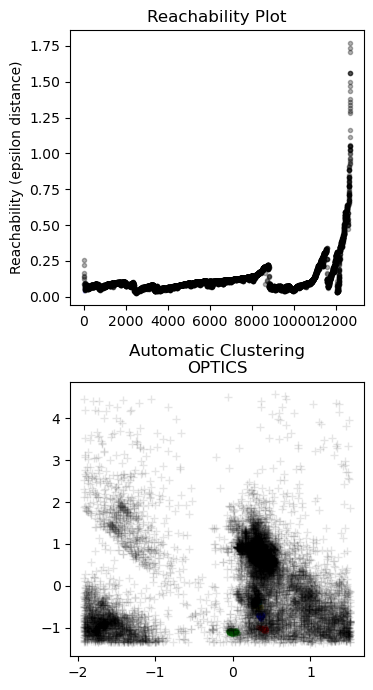

In [7]:
from matplotlib.gridspec import GridSpec

plt.figure(figsize=(10, 7))
G = GridSpec(2, 3)
ax1 = plt.subplot(G[0, 0])
ax2 = plt.subplot(G[1, 0])


# Reachability plot
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax1.set_ylabel("Reachability (epsilon distance)")
ax1.set_title("Reachability Plot")

# OPTICS
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = features[cluster.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(features[cluster.labels_ == -1, 0], features[cluster.labels_ == -1, 1], "k+", alpha=0.1)
ax2.set_title("Automatic Clustering\nOPTICS")


plt.tight_layout()
plt.show()

In [ ]:
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
kde = KernelDensity(bandwidth="scott", kernel='gaussian')
kde.fit(features[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)